## Reading lat/long for yield sites

In [72]:
from OSGridConverter import grid2latlong
import pandas as pd

cords = []

lat = []

long = []






x =pd.read_csv('2004.csv')
x = x['Unnamed: 8']
print(x)


conter2 = 7 

for counter in range(2003,2005):
    x =pd.read_csv(str(counter)+'.csv')
    x = x['Unnamed: '+str(conter2)][35:65]
    for item in x:
        t= grid2latlong(item)
        t = str(t)
        lat.append(t.split(':',1)[0])
        long.append(t.split(':',1)[1])
        if conter2 != 8:
            conter2 +=1

print(lat,long)     

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
        ...   
44    SK805735
45    SE892695
46    TF238762
47    SK973490
48    TL527705
49    TM041867
50    TF648298
51    TL432618
52    TL826647
53    TL115612
54    TM062996
55    TF281236
56    TM236668
57    TL656192
58    TR069493
59    SJ655151
60    SK687150
61    SO985002
62    SP246726
63    SU166934
64    SU404335
65    SX752425
66    SU034133
67    SD335032
68    NY121808
69     C643253
70         NaN
71         NaN
72         NaN
73         NaN
Name: Unnamed: 8, Length: 74, dtype: object
['+55.73420', '+55.23082', '+54.48458', '

## Reading lat/long for AOT40 sites


In [37]:
import glob

latl,longl,landcoverl = [],[],[]
x =glob.glob("D:/AOT/*.txt")
for item in x:
    f=open(item, "r")
    content = f.readlines()
    #print(content)


    indexx = content.index('#time;aot40\n')


    longindex = 13
    latindex = 14
    landcoverindex = 33



    long,lat,landcover = content[longindex].split(':',1)[1],content[latindex].split(':',1)[1],content[landcoverindex].split(':',1)[1]
    long,lat,landcover = long.split('\n',1)[0],lat.split('\n',1)[0],landcover.split(',',1)[0]
    longl.append(long)
    latl.append(lat)
    landcoverl.append(landcover)
    for item in content[indexx+1:]:
        Name = item.split(' ',1)
        #print(Name[0])

    f.close()


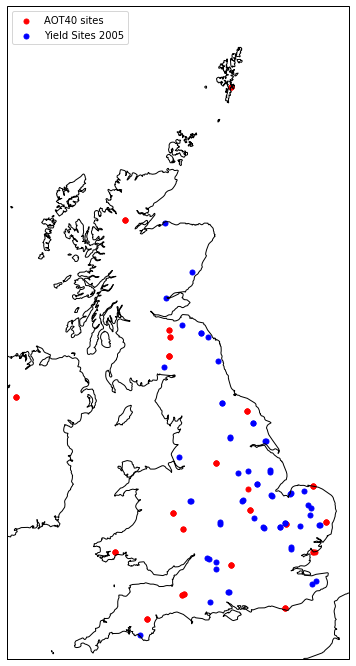

In [73]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy as cp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
import matplotlib.animation as animation
from matplotlib import ticker


longl,latl = np.array(longl),np.array(latl)

longl,latl = longl.astype(np.float), latl.astype(np.float)


long,lat = np.array(long),np.array(lat)

long,lat = long.astype(np.float), lat.astype(np.float)





fig = plt.figure(figsize=(10, 12))





ax = fig.add_subplot(projection=ccrs.OSGB())
ax.scatter(longl,latl,s=100,color='red', marker='.',transform=  ccrs.PlateCarree(),zorder =1,label = 'AOT40 sites')
ax.scatter(long,lat,s=100,color='blue', marker='.',transform=  ccrs.PlateCarree(),zorder =1,label = 'Yield Sites 2005')

ax.coastlines(resolution='10m')
plt.legend(loc = 'upper left')



plt.show()